In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Data Dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False


In [0]:
#Authentiacate

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:


train_dowloaded = drive.CreateFile({'id': '1JwWvY49lfn015JDlikvsNWb6jKD3w1pX'})
train_dowloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1phPDRWk0ybS2ltZHlmvrpme2aZ9OkO4x'})
test_downloaded.GetContentFile('test.csv')


df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
df_train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [13]:
df_test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


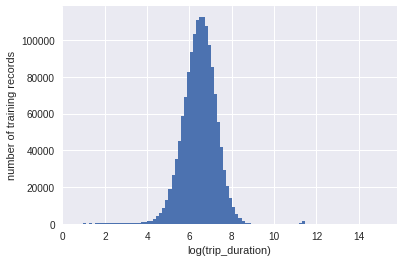

In [23]:
# Data Preprocessing

df_train['long_trip_duration'] = np.log(df_train['trip_duration'].values+1)
plt.hist(df_train['long_trip_duration'].values,bins =100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of training records')
plt.show()

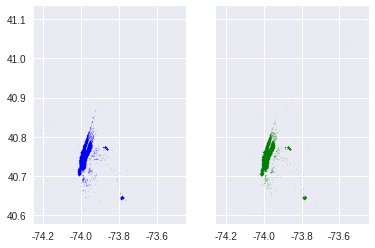

In [27]:
N = 10000
city_long_border = (-75,-75)
city_lat_border = (40,40)
fig,ax = plt.subplots(ncols = 2, sharex= True,sharey= True)
ax[0].scatter(df_train['pickup_longitude'].values[:N],
             df_train['pickup_latitude'].values[:N],
             color = 'blue',s =1, label='train', alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values[:N],
             df_test['pickup_latitude'].values[:N],
             color = 'green',s =1, label='test', alpha=0.1)
plt.show()

In [0]:
# Train Model
feature_names = list(df_train.columns)
y = np.log(df_train['trip_duration'].values + 1)
Xtr, Xtv, ytr,ytv = train_test_split(df_train[feature_names].values,y,test_size = 0.2, random_state= 1987)

Ensembles multiple models train, combining by  bagging and boosting.  

**Bagging**  : 

* It is a simple enesembling technique in which we build many independentpredictors/models/learners and combine them using some model averaging techniques. 

*   Each observation is chosen with replacement to be used as inpt for each of the model. So each model will have differnet observations based on the bootstrap process.
*   Because this technique takes many uncorrelated learners to make a final model, it reduces error by reducing variance, example of bagging ensemble is Random Forest Models

**Boosting** :

*  Boosting is an ensemble technique in which the predictors ar not made independently, but sequentially.
* Subsequent predictors learn from the mistakes of the previous predictors.
* Therefore, the observations have an unequal probability of appearing in subsequent models and ones with the highest error appear most.
* So the observations are not choosen based on the bootstrap process, but based on the error
* The predictors can be chosen from a range of models like decision trees, regressors, classifiers etc.





In [33]:
features = df_train[['vendor_id','passenger_count','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pu_hour','wday','month','workday','precipitation','snowfall','snowdepth','total_distance','total_travel_time','jfk','lga']]
target = df_train['trip_duration']

KeyError: ignored

In [34]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'long_trip_durantion', 'long_trip_duration'],
      dtype='object')